In [119]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment5.ipynb")

# STK 353

## Assignment 5: Text Mining

### Total points: 30

- Submission deadline: 23:00, Friday 7 October 2022.
- This assignment is individual work.
- Some of the tests are hidden, and some are visible in order to guide you.
- The graphs will be manually assessed.
- **NB**: books_dat1 will be used for Question 4 - 10

## Load the required packages

In [120]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
# from PIL import Image

%matplotlib inline

### Question 1 [2]

Consider the `customer_ref` string given below. Use the Python regex (re) package to find and return all the customer id values which are given by the last 4 digits in the customer reference. 

- Assign the pattern to the variable 'pat_1'
- Assign the regex function to the variable 'match_1'

<!--
BEGIN QUESTION
name: q1
points: 
    each: 1
-->

In [3]:
customer = 'CUSTIDWQBZXYRG4757, CUSTIDWQBZXYRG6090, CUSTIDWQBZXYRG4879, CUSTIDWQBZXYRG7291,\
CUSTIDWQBZXYRG5984, CUSTIDWQBZXYRG3645, CUSTIDWQBZXYRG4360, CUSTIDWQBZXYRG9341'

pat_1 = r'\d{4}'
match_1 = re.findall(pat_1,customer)

print(pat_1)
print(match_1) #Hint: this should be a list

\d{4}
['4757', '6090', '4879', '7291', '5984', '3645', '4360', '9341']


In [4]:
grader.check("q1")

q1 results: All test cases passed!

### Question 2a [4]


Consider the `phone_numbers` string given below. Use the Python regex (re) package to search and find all the dialling codes present in the string. Take note that the dialing code for this exercise comprises of the `+` sign as well as the first 2 digits. For example, the if the phone number is given as `+27824561188` then the `+27` is considered the dialing code. Once you have extracted all the dialing codes assign the unique dialing codes to the variable `unq_2a`.

- Assign the pattern to the variable 'pat_2a'
- Assign the regex function to the variable 'match_2a'
- Assign the unique dialing codes to the variable 'unq_2a'

<!--
BEGIN QUESTION
name: q2a
points: 
    each: 1
-->

In [5]:
phone_numbers = '+27617177890, +41802422217, +49627339280, +55876066668, +55753488455, +41794421438, +49630208922, +61887188951, +27630088124, +61846982747'

pat_2a = r'\+\d{2}'
match_2a = re.findall(pat_2a,phone_numbers)
unq_2a = []
for num in np.unique(match_2a):
    unq_2a.append(num)

print(match_2a)
print(unq_2a)

['+27', '+41', '+49', '+55', '+55', '+41', '+49', '+61', '+27', '+61']
['+27', '+41', '+49', '+55', '+61']


In [6]:
grader.check("q2a")

q2a results: All test cases passed!

### Question 2b [2]


Consider the `phone_numbers` string given below. Use the Python regex (re) package to search and replace the dialling code with the number zero. Take note that the dialing code for this exercise comprises of the `+` sign as well as the first 2 digits. For example, the if the phone number is given as `+27824561188` then the `+27` should be replaced with `0` and thus the value returned should be `0824561188`

- Assign the pattern to the variable 'pat_2b'
- Assign the regex function to the variable 'match_2b'

<!--
BEGIN QUESTION
name: q2b
points: 
    each: 1
-->

In [7]:
phone_numbers = '+27617177890, +41802422217, +49627339280, +55876066668, +55753488455, +41794421438, +49630208922, +61887188951, +27630088124, +61846982747'

pat_2b = r'\+\d{2}'
match_2b = re.sub(pat_2b,"0",phone_numbers)

print(match_2b)

0617177890, 0802422217, 0627339280, 0876066668, 0753488455, 0794421438, 0630208922, 0887188951, 0630088124, 0846982747


In [8]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 3a [1]

Consider the `sample_text3` given below. Use Python string methods to split the text such that each sentence in the paragraph is a seperate sentences. 

- Assign the new list to the variable 'new_text3'

<!--
BEGIN QUESTION
name: q3a
points: 
    each: 0.5
-->

In [68]:
sample_text3 = 'The family of Dashwood had long been settled in Sussex.\
Their estate was large and their residence was at Norland Park in the centre of their property where\
for many generations they had lived in so respectable a manner as to engage the general good opinion of their\
surrounding acquaintance.  The late owner of this estate was a single man who lived to a very advanced age\
and who for many years of his life had a constant companion and housekeeper in his sister.\
But her death, which happened ten years before his own, produced a great alteration in his home;\
for to supply her loss he invited and received into his house the family of his nephew Mr Henry Dashwood\
the legal inheritor of the Norland estate and the person to whom he intended to bequeath it.\
In the society of his nephew and niece and their children the old Gentleman\'s days were comfortably spent.\
His attachment to them all increased.  The constant attention of Mr and Mrs Henry Dashwood to his wishes\
which proceeded not merely from interest but from goodness of heart gave him every degree of solid\
comfort which his age could receive; and the cheerfulness of the children added a relish to his existence.'

new_text3 = sample_text3.split('.')
print(new_text3)

['The family of Dashwood had long been settled in Sussex', 'Their estate was large and their residence was at Norland Park in the centre of their property wherefor many generations they had lived in so respectable a manner as to engage the general good opinion of theirsurrounding acquaintance', '  The late owner of this estate was a single man who lived to a very advanced ageand who for many years of his life had a constant companion and housekeeper in his sister', 'But her death, which happened ten years before his own, produced a great alteration in his home;for to supply her loss he invited and received into his house the family of his nephew Mr Henry Dashwoodthe legal inheritor of the Norland estate and the person to whom he intended to bequeath it', "In the society of his nephew and niece and their children the old Gentleman's days were comfortably spent", 'His attachment to them all increased', '  The constant attention of Mr and Mrs Henry Dashwood to his wisheswhich proceeded no

In [69]:
grader.check("q3a")

q3a results: All test cases passed!

### Question 3b [1]

Use the fourth sentence in 'sample_text3' (Question 3 a) and split the sentence even further at the semi-colon.

- Assign the new list to the variable 'new_list3'

<!--
BEGIN QUESTION
name: q3b
points: 
    each: 0.5
-->

In [70]:
new_list3 = new_text3[3].split(';')
print(new_list3)

['But her death, which happened ten years before his own, produced a great alteration in his home', 'for to supply her loss he invited and received into his house the family of his nephew Mr Henry Dashwoodthe legal inheritor of the Norland estate and the person to whom he intended to bequeath it']


In [71]:
grader.check("q3b")

q3b results: All test cases passed!

The following questions are based on the books_dat1.csv data set:

### Question 4 - Remove NaN rows from text [3]

The data can be found in 'books_dat1.csv'

- Use the code provided to read the data into a dataframe and call it '**books**'
- **Do not change the data import code**. Ensure that the file path for your dataset matches the file path given. 
- The dataset contains text from various books. 

Using python functions remove the rows containing 'NaN' in the text column of the books data set. The new dataset without the NaN text rows should be named '**books_new**'.

**Note**: Pay attention to the variable names specified. It is important that you keep to the names specified.

<!--
BEGIN QUESTION
name: q4
points: 
    each: 1
-->

In [72]:
books = pd.read_csv('books_dat1.csv')
print(books.head())

books_new = books.dropna().reset_index(drop=True)
print(books_new.head())

   gutenberg_id    text                  title
0            36  cover   The War of the Worlds
1            36     NaN  The War of the Worlds
2            36     NaN  The War of the Worlds
3            36     NaN  The War of the Worlds
4            36     NaN  The War of the Worlds
   gutenberg_id                                               text  \
0            36                                             cover    
1            36                              The War of the Worlds   
2            36                                     by H. G. Wells   
3            36     ‘But who shall dwell in these worlds if the...   
4            36      . . . Are we or they Lords of the World? ....   

                   title  
0  The War of the Worlds  
1  The War of the Worlds  
2  The War of the Worlds  
3  The War of the Worlds  
4  The War of the Worlds  


In [73]:
grader.check("q4")

q4 results: All test cases passed!

### Question 5 - Remove noise [2]

Use python string methods and regular expressions to remove the following noise in the text column of the books_new data set,

- set the case of the data set to lower case.
- remove extra whitespaces from the text.
- Add a column 'clean_text' containing the clean, pre-processed text.

<!--
BEGIN QUESTION
name: q5
points: 
    each: 1
-->

In [74]:
books_new['clean_text'] = books_new['text'].str.lower().str.strip()
print(books_new)

#books_new.clean_text[2]


       gutenberg_id                                               text  \
0                36                                             cover    
1                36                              The War of the Worlds   
2                36                                     by H. G. Wells   
3                36     ‘But who shall dwell in these worlds if the...   
4                36      . . . Are we or they Lords of the World? ....   
...             ...                                                ...   
43208          1400  I took her hand in mine, and we went out of th...   
43209          1400  the morning mists had risen long ago when I fi...   
43210          1400  the evening mists were rising now, and in all ...   
43211          1400  tranquil light they showed to me, I saw no sha...   
43212          1400                                          from her.   

                       title  \
0      The War of the Worlds   
1      The War of the Worlds   
2      The War 

In [75]:
grader.check("q5")

q5 results: All test cases passed!

### Question 6 - Bag-of-Words vectorization [2]

- Use the CountVectorizer module from sklearn and define an instance matrix named 'ins_matrix'
- Use the instance matrix to tokenize and count the word occurrences of the text. Assign this tokenization to the variable 'tok'.
- From inspecting 'tok', what is the vocabulary size? Assign this number to the variable 'vocab_size'
- From inspecting 'tok', what is the total word count in the corpus? Assign this number to the variable 'word_count'

**Note**: Use the clean_text column.

<!--
BEGIN QUESTION
name: q6
points: 
    each: 1
-->

In [76]:

ins_matrix = CountVectorizer()
tok = ins_matrix.fit_transform(list(books_new.clean_text))
print(tok.shape)

vocab_size = len(ins_matrix.vocabulary_)
word_count = np.sum(tok)

(43213, 18592)


In [77]:
grader.check("q6")

q6 results: All test cases passed!

### Question 7 - Get the word frequency [4]

Once fitted, use the feature indices

- Make a list of all of the unique words in the vocabulary. Call this list 'unique_words'
- What is the 980th word in 'unique_words'? Assign this to the variable 'word_980'
- What is the index of the word 'elizabeth'? Assign this to the variable 'elizabeth_index'

Remember, tok is the bag-of-words representation of the corpus.
- Convert tok to an array using the to_array function. Assign this array to 'tok_array'
- Sum across the x-axis in order to get the word frequencies. Assign this list to the variable 'sum_words'
- What is the frequency of the word 'elizabeth'? Assign this to the variable 'elizabeth_freq'

**Note**: Use the clean_text column.  
**Hint**: Remember, Python indexing starts at 0.

<!--
BEGIN QUESTION
name: q7
points: 
    each: 1
-->

In [126]:
unique_words = ins_matrix.get_feature_names()
word_980 = unique_words[979]
elizabeth_index = unique_words.index("elizabeth")
tok_array = tok.toarray()
sum_words = tok_array.sum(axis=0)
elizabeth_freq = sum_words[5640]

#print(elizabeth_index)


MemoryError: 

In [127]:
grader.check("q7")

q7 results: All test cases passed!

### Question 8 - Write a function to find the top 20 non-stopword features in 'unique_words' [4]

- Function name: top_20_features  
- Input: text  
- Output: A list of tuples where the first tuple item is the word and the second tuple item is the frequency. Call this list 'top_20'

**Note**: Use the clean_text column. 

<!--
BEGIN QUESTION
name: q8
points: 
    each: 1
-->

In [148]:

def top_20_features(text):
    
    vec = CountVectorizer(stop_words = 'english')
    bag_of_words = vec.fit_transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, index]) for word, index in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

text = list(books_new.clean_text)
top_20 = top_20_features(text)
print(top_20)


[('said', 2250), ('mr', 1506), ('did', 846), ('time', 845), ('know', 763), ('little', 751), ('joe', 747), ('man', 726), ('like', 711), ('miss', 676), ('captain', 654), ('elizabeth', 634), ('saw', 608), ('day', 583), ('come', 579), ('went', 570), ('say', 554), ('came', 549), ('think', 545), ('good', 545)]


In [144]:
grader.check("q8")

q8 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 9 - Plot the top 20 non-stopword features as a bar plot [3]

- Rotate the x-axis in order for the words not to overlap
- Provide an appropriate title

<!--
BEGIN QUESTION
name: q9
manual: true
points: 3
-->

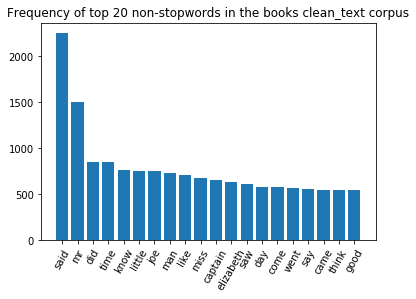

In [145]:
#%matplotlib inline
#import matplotlib.pyplot as plt
plt.bar(range(20), [val[1] for val in top_20], align='center')
plt.xticks(range(20), [val[0] for val in top_20])
plt.xticks(rotation=60)
plt.title('Frequency of top 20 non-stopwords in the books clean_text corpus')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 10 - Plot a wordcloud for text [2]

- Plot a wordcloud for the text column.

- Use randomstate = 25

**Note**: Use the all_clean_text variable given which is obtained by the clean_text variable. 

<!--
BEGIN QUESTION
name: q10
manual: true
points: 2
-->

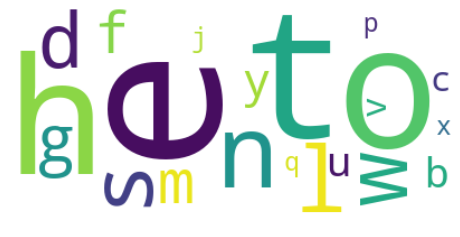

In [149]:
all_clean_text = " ".join(clean_text for clean_text in clean_text)
wordcloud_text = WordCloud(background_color = "white", random_state = 25).generate(all_clean_text)

plt.figure(figsize = (8,8))
plt.imshow(wordcloud_text, interpolation = "bilinear")
plt.axis("off")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)